<a href="https://colab.research.google.com/github/space-data-robert/compet-python-machine/blob/master/house-price-regressor-ensemble-stacked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import warnings
import pandas as pd
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data_id = data.pop('Id')

print(f'data shape = {data.shape}')
data.head(2)

data shape = (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


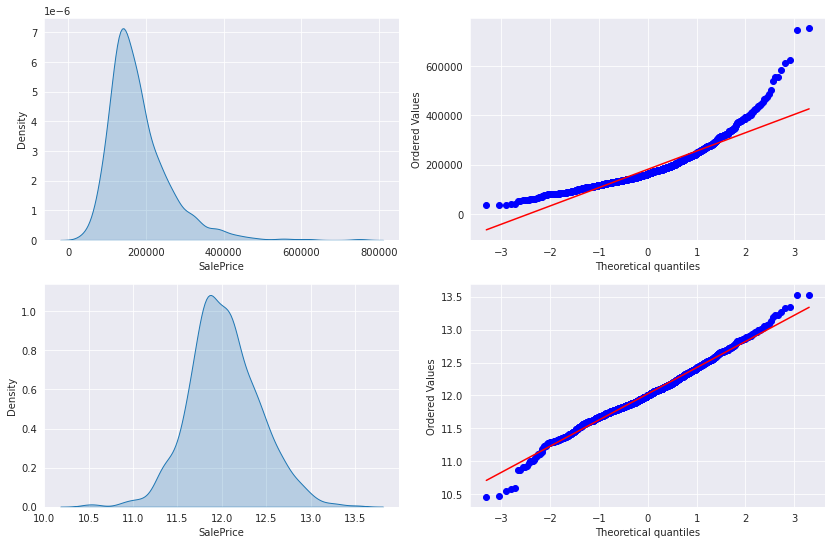

In [190]:
import numpy as np
from scipy import stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14, 9)

sns.kdeplot(
    data=data, x='SalePrice', shade=True, 
    ax=ax1
)
stats.probplot(
    data.SalePrice, 
    plot=ax2
)
ax2.set(title=None)

def log_scaler(x):
    return np.log1p(x)

def exp_scaler(x):
    return np.exp(x)

data.SalePrice = data.SalePrice.apply(log_scaler)

sns.kdeplot(
    data=data, x='SalePrice', shade=True, 
    ax=ax3
)
stats.probplot(
    data.SalePrice, 
    plot=ax4
)
ax4.set(title=None)

# this function is make a pipeline.

# log_scaler = FunctionTransformer(
#     log_scaler, 
#     inverse_func=exp_scaler
# )

plt.show()

In [191]:
from sklearn.model_selection import train_test_split

x_data = data.copy()
x_data = pd.get_dummies(
    x_data, dummy_na=True
).dropna(axis=0)

y_data = x_data.pop('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=27
)
train_ind, test_ind = x_train.index, x_test.index

print(f'train shape = {x_train.shape}, {y_train.shape}')
x_train.head(2)

train shape = (784, 331), (784,)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQ

In [226]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=50)
selector.fit_transform(x_train, y_train)

selected_mask = selector.get_support()
all_feature = x_train.columns

selected_feature = all_feature[selected_mask]

selection = pd.DataFrame(
    [c.split('_') for c in selected_feature], 
    columns=['ImportantFeature', 'ImportantValue']
)
selection.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
ImportantFeature,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning,MSZoning,LotShape,LotShape,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,MasVnrType,ExterQual,ExterQual,ExterQual,Foundation,Foundation,BsmtQual,BsmtQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,HeatingQC,KitchenQual,KitchenQual,KitchenQual,FireplaceQu,FireplaceQu,GarageType,GarageType,GarageFinish,GarageFinish,SaleType,SaleCondition
ImportantValue,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,RL,RM,IR1,Reg,NridgHt,VinylSd,VinylSd,None,Stone,Ex,Gd,TA,CBlock,PConc,Ex,Gd,TA,Gd,GLQ,Ex,TA,Ex,Gd,TA,Gd,nan,Attchd,Detchd,Fin,Unf,New,Partial


In [ ]:
!pip install auto-sklearn

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import root_mean_squared_error

minute = 5

automl = AutoSklearnRegressor(
    load_models=True,
    time_left_for_this_task=60*minute,
    resampling_strategy='cv',
    metric=root_mean_squared_error,
    ensemble_size=5,
    memory_limit=10**4,
    seed=27,
)
automl.fit(
    x_train[selected_feature], 
    y_train
)

y_pred = automl.predict(
    x_test[selected_feature]
)
test_score = root_mean_squared_error(
    y_test, y_pred
)

# this score is baseline.

print(f'test score = {-test_score:.5f}')

automl.leaderboard()

val score = 0.12952473922726782


,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.8,random_forest,0.155424,25.166197
15,2,0.2,ard_regression,0.182434,13.606886


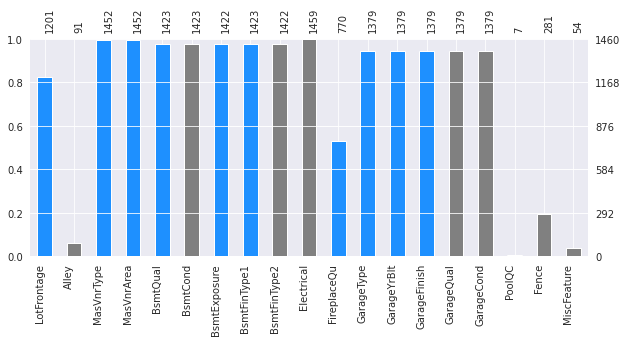

In [9]:
import missingno as msno

missing_mask = (
    data.isna().sum() != 0
).values

missing_feature = data.columns[missing_mask]

importance_feature = set(
    selection.ImportantFeature
)

importance_mask = ['gray'] * len(importance_feature)

for n, f in enumerate(missing_feature):
    if f not in importance_feature:
        continue
    importance_mask[n] = 'dodgerblue'

msno.bar(
    data[missing_feature],
    figsize=(10, 4), fontsize=10, label_rotation=90,
    color=importance_mask
)
plt.show()

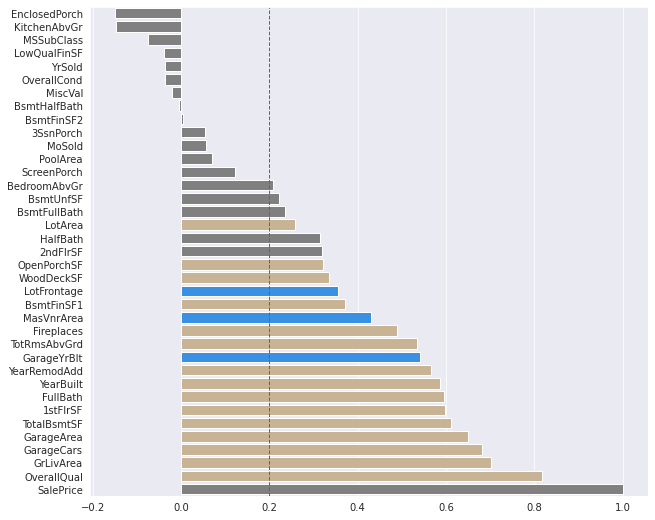

In [10]:
plt.subplots(figsize=(10, 9))

correlation = data.corr().SalePrice.sort_values()

correlated_missing_mask = [1 if f in missing_feature else 2 for f in correlation.index]
correlated_importance_mask = [3 if f in importance_feature else 1 for f in correlation.index]

correlated_mask = np.multiply(
    correlated_missing_mask,
    correlated_importance_mask
)

correlated_map = {
    1: 'gray',          # this low importance.
    2: 'gray',          #      missing value.
    3: 'dodgerblue',    #      high importance and missing value.
    6: 'tan'            #      high importance and nice.
}
correlated_mask = [correlated_map[f] for f in correlated_mask]

sns.barplot(
    x=correlation.values,
    y=correlation.index,
    orient='h',
    palette=correlated_mask
)
plt.axvline(x=0.2, linewidth=1, linestyle='--')
plt.show()

In [ ]:
# there are feature engineering.

In [193]:
from scipy.stats import skew # norm

nummer_feature = data.dtypes[data.dtypes != 'object'].index

skewed_feature  = data[nummer_feature].apply(
    lambda x: skew(x.dropna())
).sort_values(ascending=False)

skewness = skewed_feature.to_frame('Skew')

print(f'skewness = {skewness .shape}')
skewness.T

skewness = (37, 1)


,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,MasVnrArea,OpenPorchSF,LotFrontage,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,MSSubClass,1stFlrSF,GrLivArea,BsmtUnfSF,2ndFlrSF,OverallCond,TotRmsAbvGrd,HalfBath,Fireplaces,BsmtFullBath,OverallQual,MoSold,BedroomAbvGr,GarageArea,SalePrice,YrSold,FullBath,GarageCars,YearRemodAdd,YearBuilt,GarageYrBlt
Skew,24.45164,14.813135,12.195142,10.293752,9.00208,4.483784,4.250888,4.117977,4.099186,3.086696,2.666326,2.361912,2.160866,1.683771,1.539792,1.522688,1.40621,1.375342,1.365156,0.919323,0.812194,0.692355,0.675646,0.675203,0.648898,0.595454,0.216721,0.211835,0.211572,0.179796,0.121222,0.09617,0.036524,-0.342197,-0.503044,-0.612831,-0.648708


In [194]:
from scipy.special import boxcox1p

skewness = skewness[abs(skewness) >= 0.75]
skewed_feature = skewness.index

# this function is make a pipeline.

lam = 0.15

for n, f in enumerate(skewed_feature):
    data[f] = boxcox1p(data[f], lam)

boxcox_transformer = FunctionTransformer(
    boxcox1p
)

print(f'boxcox transformed count = {n}')

boxcox count = 36


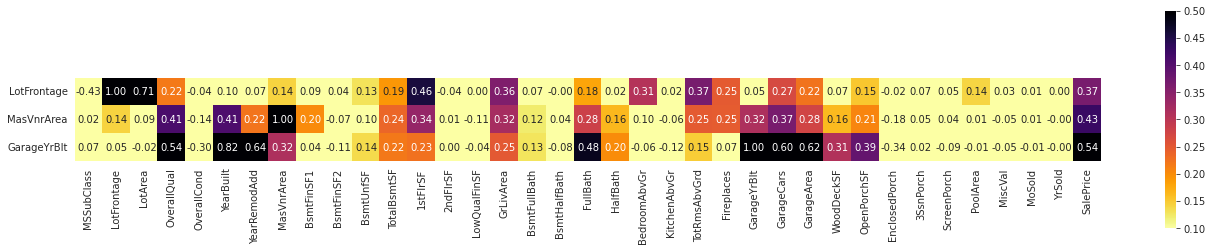

In [13]:
plt.subplots(figsize=(23, 4))

threshold = len(data) * 0.7

imputed_feature = (
    data[missing_feature].isna().sum()
).to_frame('Isna')

imputed_feature = (
    imputed_feature[imputed_feature.Isna <= threshold]
).index

correlation = data.corr()

sns.heatmap(
    correlation.filter(imputed_feature).T,
    cbar=True, annot=True, square=True, fmt='.2f',
    cmap='inferno_r', vmin=0.1, vmax=0.5
)
plt.show()

In [ ]:
!pip install autoimpute

In [197]:
from autoimpute.imputations import SingleImputer

prep_data = data.copy()

# this function is make a pipeline.

imputer = SingleImputer(
    strategy={
        'LotFrontage': 'pmm',
        'MasVnrArea': 'pmm', 
        'GarageYrBlt': 'pmm'
        # this binary logistic case.
        # categorical': 'multinomial logistic' 
        #             : 'bayesian binary logistic'
    },
    predictors={
        'LotFrontage': ['1stFlrSF', 'GrLivArea', 'LotArea'], 
        'MasVnrArea': ['OverallQual', 'GrLivArea', 'GarageArea'],
        'GarageYrBlt': ['YearBuilt', 'YearRemodAdd'],
        
    },
    seed=27
)

prep_data = imputer.fit_transform(prep_data)

prep xy train shape = (1022, 332), (1022,)


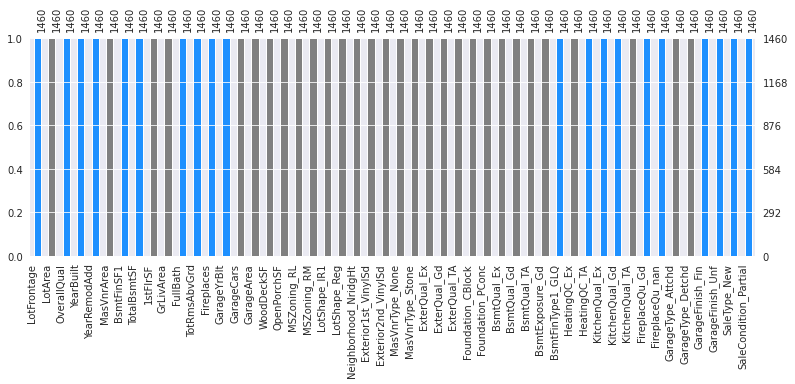

In [411]:
prep_x_data = prep_data.copy()

prep_x_data = pd.get_dummies(
    prep_x_data, dummy_na=True
)
prep_y_data = prep_x_data.pop('SalePrice')

prep_x_train, prep_x_test, prep_y_train, prep_y_test = train_test_split(
prep_x_data, prep_y_data, test_size=0.3, random_state=27
)

print(f'prep xy train shape = {prep_x_train.shape}, {prep_y_train.shape}')

msno.bar(
    prep_x_data.filter(selected_feature),
    figsize=(13, 4), fontsize=10, label_rotation=90,
    color=importance_mask
)
plt.show()

In [417]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def make_feature_total_sf(data):
    data['TotalSF'] = data.apply(
        lambda data: data['TotalBsmtSF'] + data['1stFlrSF'],
        axis=1
    )
    return data

p1 = ('create total sf', FunctionTransformer(make_feature_total_sf))

feature_engineer = ColumnTransformer([
    p1, 
])

print(f'prep xy train shape = {prep_x_train.shape}, {prep_y_train.shape}')
prep_x_train.head(2)

prep xy train shape = (1022, 332), (1022,)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,

In [418]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self 

    def transform(self, X, y=None):
        return X[self.feature_name]

feature_name = list(selected_feature).copy()
feature_name.append('TotalSF')

feature_name = list(
    set(feature_name) - set(['TotalBsmtSF', '1stFlrSF'])
)

p2 = ('feature select', FeatureSelector(feature_name))

print(f'prep xy train shape = {prep_x_train.shape}, {prep_x_test.shape}')
prep_x_train.head(2)

prep xy train shape = (1022, 332), (438, 332)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,

In [414]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

p3 = ('robust scaler', RobustScaler())

print(f'prep xy train shape = {prep_x_train.shape}, {prep_y_train.shape}')
prep_x_train.head(2)

prep xy train shape = (1022, 332), (1022,)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,

In [422]:
from sklearn import set_config
set_config(display='diagram')

pipeline = Pipeline([
    p1, p2, p3,
])    

display(pipeline)

pipeline.fit_transform(prep_x_data).shape

Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'KitchenQual_TA',
                                               'Foundation_CBlock',
                                               'LotFrontage', 'GarageCars',
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler())])

(1460, 49)

In [423]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

def trainer(pipeline):   
    val_score = cross_val_score(
        pipeline,
        prep_x_train, prep_y_train,
        cv=5,
        scoring=make_scorer(mean_squared_error, greater_is_better=False)
    )

    score_mean = np.sqrt(
        -val_score.mean()
    )
    
    score_std = val_score.std()

    print(f'valid score (std) = {score_mean:.5f} ({score_std:.5f})')

    pipeline.fit(prep_x_train, prep_y_train)

    prep_y_pred = pipeline.predict(prep_x_test)

    test_score = mean_squared_error(
        prep_y_test, prep_y_pred, squared=False
    )
    
    print(f'test score = {test_score:.5f}')

In [523]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, ElasticNet

lasso = ('model', Lasso(alpha =0.0005, random_state=27))
enet = ('model', ElasticNet(alpha=0.0005, random_state=27))

for model in [lasso, enet]:
    pipeline = Pipeline([
        p1, p2, p3,
        model
    ])    
    trainer(pipeline)

    display(pipeline)

valid score (std) = 0.01711 (0.00008)
test score = 0.01670


Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'K...
                                               'Foundation_CBlock',
                                               'LotFrontage', 'GarageCars',
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler()),
                ('model', Lasso(alpha=0.0005, random_state=27))])

valid score (std) = 0.01690 (0.00009)
test score = 0.01643


Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'K...
                                               'Foundation_CBlock',
                                               'LotFrontage', 'GarageCars',
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler()),
                ('model', ElasticNet(alpha=0.0005, random_state=27))])

In [522]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

gboost = (
    'model',
    GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_features='sqrt', random_state=27)
)

xgboost = (
    'model', 
    xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000, learning_rate=0.05, 
    random_state=27, nthread=-1)
)

lgbm = (
    'model',
    lgb.LGBMRegressor(
    learning_rate=0.05, n_estimators=1000,
    random_state=27)
)

for model in [gboost, xgboost, lgbm]:
    pipeline = Pipeline([
        p1, p2, p3,
        model
    ])    
    trainer(pipeline)

    display(pipeline)

valid score (std) = 0.01671 (0.00005)
test score = 0.01684


Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'K...
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           max_features='sqrt',
                                           n_estimators=3000,
                                           random_state=27))])

valid score (std) = 0.01737 (0.00007)
test score = 0.01659


Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'K...
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler()),
                ('model',
                 XGBRegressor(learning_rate=0.05, n_estimators=2000, nthread=-1,
                              objective='reg:squarederror', random_state=27))])

valid score (std) = 0.01735 (0.00005)
test score = 0.01785


Pipeline(steps=[('create total sf',
                 FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                ('feature select',
                 FeatureSelector(feature_name=['GarageType_Attchd',
                                               'MSZoning_RL', 'GrLivArea',
                                               'MSZoning_RM', 'BsmtQual_TA',
                                               'KitchenQual_Ex',
                                               'Exterior2nd_VinylSd',
                                               'BsmtQual_Gd',
                                               'Neighborhood_NridgHt',
                                               'GarageYrBlt', 'ExterQual_Gd',
                                               'BsmtQual_Ex', 'K...
                                               'LotFrontage', 'GarageCars',
                                               'LotArea', 'MasVnrType_Stone',
                                               'YearRemodAdd', 'TotalSF',
                                               'YearBuilt', 'ExterQual_TA',
                                               'LotShape_Reg', 'OpenPorchSF',
                                               'KitchenQual_Gd', 'ExterQual_Ex',
                                               'SaleCondition_Partial',
                                               'BsmtExposure_Gd',
                                               'BsmtFinType1_GLQ',
                                               'LotShape_IR1', ...])),
                ('robust scaler', RobustScaler()),
                ('model',
                 LGBMRegressor(learning_rate=0.05, n_estimators=1000,
                               random_state=27))])

In [509]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV

def param_tuner(pipeline, param_grid):
    n_iter = 10

    scoring = {
        'mean_squared_log_error': make_scorer(
            mean_squared_log_error, greater_is_better=False
        ),
        'mean_squared_error': make_scorer(
            mean_squared_error, greater_is_better=False
        )
    }

    grid = RandomizedSearchCV(
        estimator=pipeline, 
        param_distributions=param_grid,
        cv=5,
        scoring=scoring,
        refit='mean_squared_error',
        n_iter=n_iter,
        random_state=27,
    )
    grid.fit(prep_x_train, prep_y_train)

    print(f'best score = {np.sqrt(-grid.best_score_):.5f}')

    best_model = grid.best_params_['model']

    display(best_model)

In [513]:
param_grid = {
    'model': [GradientBoostingRegressor(random_state=27)],
    'model__n_estimators': np.arange(1000, 3000, 500),
    'model__learning_rate': (00.1 ** 3) * np.linspace(1, 50, 50),
    'model__max_depth': np.linspace(1, 16, 16),
    'model__min_samples_split': np.linspace(1, 16, 16),
}

model = ('model', GradientBoostingRegressor(random_state=27))

pipeline = Pipeline([
    p1, p2, p3,
    model
])  

param_tuner(pipeline, param_grid)

best score = 0.01710


GradientBoostingRegressor(learning_rate=0.05000000000000001, max_depth=1.0,
                          min_samples_split=1.0, n_estimators=2000,
                          random_state=27)

In [529]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

gboost_ = Pipeline([
    p1, p2, p3,
    gboost
])   
lasso_ = Pipeline([
    p1, p2, p3,
    lasso
])   
enet_ = Pipeline([
    p1, p2, p3,
    enet
])   
lgbm_ = Pipeline([
    p1, p2, p3,
    lgbm
])  

estimators = [
    ('gboost', gboost_),
    ('lasso', lasso_),
    ('enet', enet_),
    ('lgbm', lgbm_),
]

stacking = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV()
)

stacking.fit(prep_x_train, prep_y_train)

prep_y_pred = stacking.predict(prep_x_test)

test_score = mean_squared_error(
    prep_y_test, prep_y_pred, squared=False
)
print(f'test score = {test_score:.5f}')

display(stacking)

test score = 0.01598


StackingRegressor(estimators=[('gboost',
                               Pipeline(steps=[('create total sf',
                                                FunctionTransformer(func=<function make_feature_total_sf at 0x7fd04f47c3b0>)),
                                               ('feature select',
                                                FeatureSelector(feature_name=['GarageType_Attchd',
                                                                              'MSZoning_RL',
                                                                              'GrLivArea',
                                                                              'MSZoning_RM',
                                                                              'BsmtQual_TA',
                                                                              'KitchenQual_Ex',
                                                                              'Exterior2nd_VinylSd',
                                                                              'BsmtQual_Gd',
                                                                              'Neighborhood_NridgHt',
                                                                              'Gara...
                                                                              'YearRemodAdd',
                                                                              'TotalSF',
                                                                              'YearBuilt',
                                                                              'ExterQual_TA',
                                                                              'LotShape_Reg',
                                                                              'OpenPorchSF',
                                                                              'KitchenQual_Gd',
                                                                              'ExterQual_Ex',
                                                                              'SaleCondition_Partial',
                                                                              'BsmtExposure_Gd',
                                                                              'BsmtFinType1_GLQ',
                                                                              'LotShape_IR1', ...])),
                                               ('robust scaler',
                                                RobustScaler()),
                                               ('model',
                                                LGBMRegressor(learning_rate=0.05,
                                                              n_estimators=1000,
                                                              random_state=27))]))],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

### 참고 자료
- Scicit Learn Stacking [Link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html)
- Stacked Regressions [Link](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard)
- Comprehensive Data Exploration [Link](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)